<a href="https://colab.research.google.com/github/erigitola/-Random-User--Generator--using--API/blob/main/Financial_Transactions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('/content/cards_data.csv')

# Display first 5 roows
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4.344680e+15,Dec-22,623,YES,2,"$24,295",Sep-02,2008,No
1,2731,825,Visa,Debit,4.956970e+15,Dec-20,393,YES,2,"$21,968",Apr-14,2014,No
2,3701,825,Visa,Debit,4.582310e+15,Feb-24,719,YES,2,"$46,414",Jul-03,2004,No
3,42,825,Visa,Credit,4.879490e+15,Aug-24,693,NO,1,"$12,400",Jan-03,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5.722870e+15,Mar-09,75,YES,1,$28,Sep-08,2009,No


In [18]:
df.tail()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,is_expired,pin_age
6141,5361,185,Amex,Credit,3.006100e+14,NaT,663,YES,1,6900.0,Nov-00,2013,No,False,13
6142,2711,185,Visa,Credit,4.718520e+15,NaT,492,YES,2,5700.0,Apr-12,2012,No,False,14
6143,1305,1007,Mastercard,Credit,5.929510e+15,NaT,237,NO,2,9200.0,Feb-12,2012,No,False,14
6144,743,1110,Mastercard,Debit,5.589770e+15,NaT,630,YES,1,28074.0,Jan-20,2020,No,False,6
6145,3199,1110,Visa,Credit,4.994010e+15,NaT,120,YES,1,14400.0,May-17,2017,No,False,9


In [5]:
# Shows columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   float64
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   object 
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   object 
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 624.3+ KB


In [6]:
# Total Number of cards
total_cards = df.shape[0]
total_cards

6146

In [7]:
# Card by brand
brand_summary = df['card_brand'].value_counts().reset_index()
brand_summary.columns = ['card_brand', 'total_cards']
brand_summary

,card_brand,total_cards
0,Mastercard,3209
1,Visa,2326
2,Amex,402
3,Discover,209


In [9]:
# Cards by type
card_type_summary = df['card_type'].value_counts().reset_index()
card_type_summary.columns = ['card_type', 'total_cards']
card_type_summary

,card_type,total_cards
0,Debit,3511
1,Credit,2057
2,Debit (Prepaid),578


In [11]:

# Convert expiry to datetime

df["expires"] = pd.to_datetime(df["expires"], errors="coerce")

# Current date
today = pd.Timestamp.today()

# Flag expired cards
df["is_expired"] = df["expires"] < today

# Count expired cards
expired_summary = df["is_expired"].value_counts()
expired_summary


,count
is_expired,
False,6139
True,7


In [12]:
# Chip security check
chip_summary = df['has_chip'].value_counts()
chip_summary

,count
has_chip,
YES,5500
NO,646


In [13]:
# Clean credit limit column
df['credit_limit'] = df['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

# Statistics
df['credit_limit'].describe()

,credit_limit
count,6146.000000
mean,14347.493980
std,12014.463884
min,0.000000
25%,7042.750000
50%,12592.500000
75%,19156.500000
max,151223.000000


In [17]:
# PIN age analysis
current_year = pd.Timestamp.today().year
df['pin_age'] = current_year - df['year_pin_last_changed']

df['pin_age'].describe()

,pin_age
count,6146.000000
mean,12.563293
std,4.270699
min,6.000000
25%,9.000000
50%,13.000000
75%,16.000000
max,24.000000


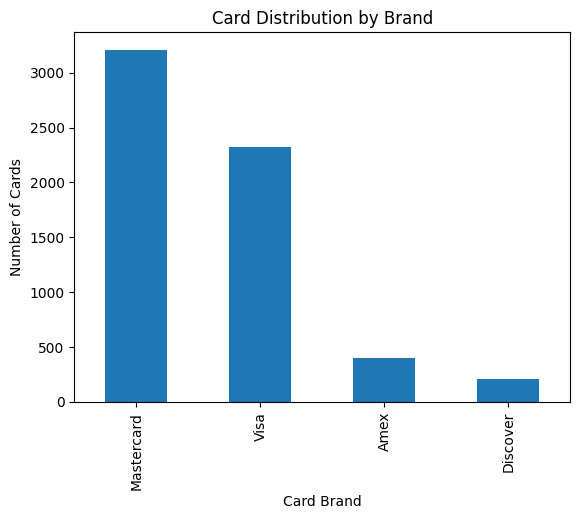

In [19]:
# Cards by brand
brand_summary = df["card_brand"].value_counts()

plt.figure()
brand_summary.plot(kind="bar")
plt.title("Card Distribution by Brand")
plt.xlabel("Card Brand")
plt.ylabel("Number of Cards")
plt.show()


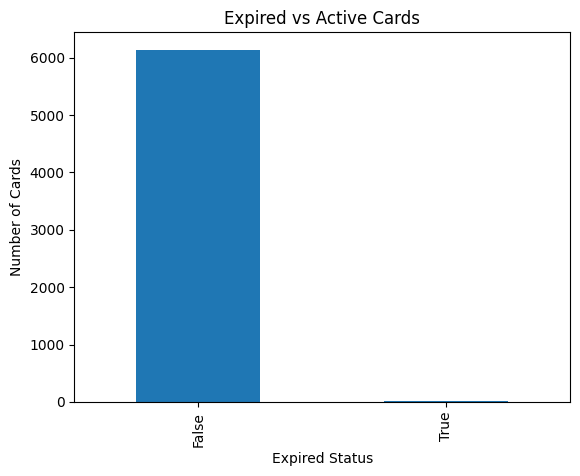

In [21]:
# Expired card count
expired_summary = df["is_expired"].value_counts()

plt.figure()
expired_summary.plot(kind="bar")
plt.title("Expired vs Active Cards")
plt.xlabel("Expired Status")
plt.ylabel("Number of Cards")
plt.show()


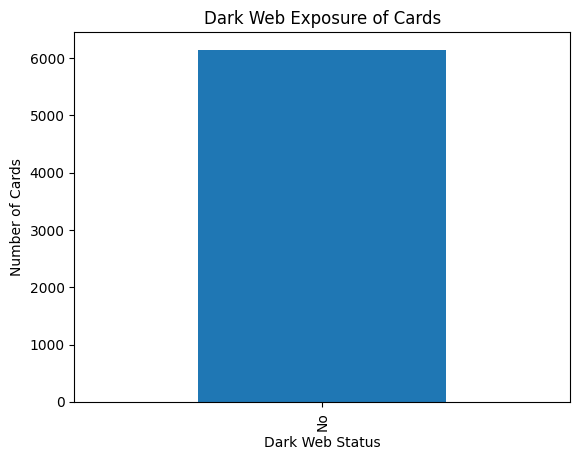

In [22]:
# Dark web exposure
darkweb_summary = df["card_on_dark_web"].value_counts()

plt.figure()
darkweb_summary.plot(kind="bar")
plt.title("Dark Web Exposure of Cards")
plt.xlabel("Dark Web Status")
plt.ylabel("Number of Cards")
plt.show()


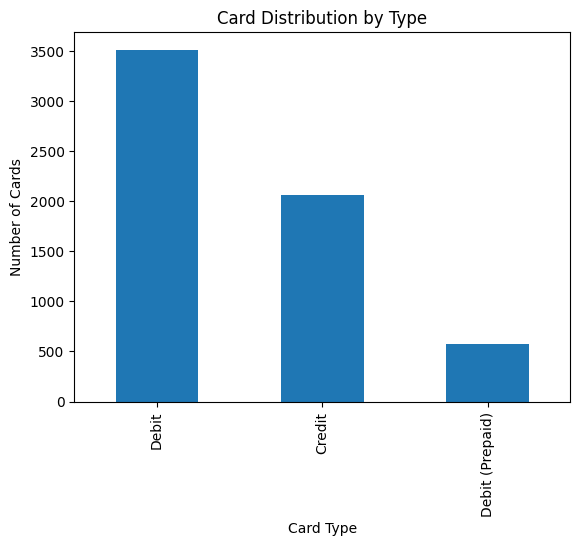

In [20]:
# Cards by type
type_summary = df["card_type"].value_counts()

plt.figure()
type_summary.plot(kind="bar")
plt.title("Card Distribution by Type")
plt.xlabel("Card Type")
plt.ylabel("Number of Cards")
plt.show()


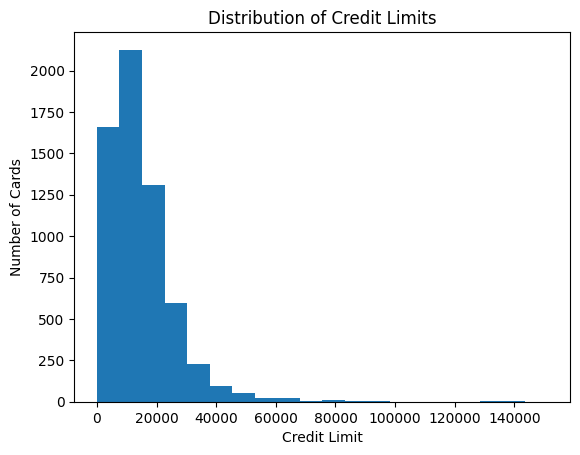

In [23]:
# Credit limit distribution
plt.figure()
plt.hist(df["credit_limit"], bins=20)
plt.title("Distribution of Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Cards")
plt.show()


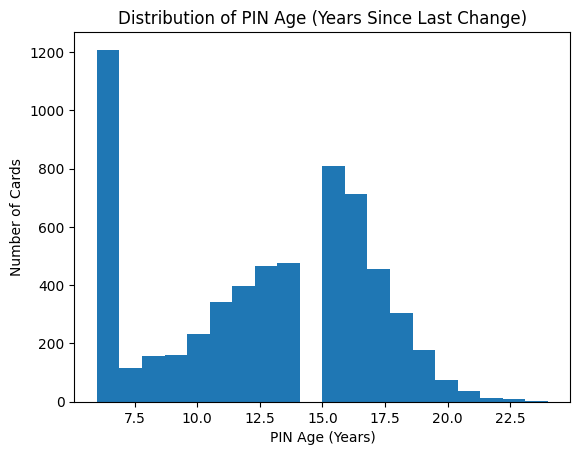

In [24]:
# PIN age distribution
plt.figure()
plt.hist(df["pin_age"], bins=20)
plt.title("Distribution of PIN Age (Years Since Last Change)")
plt.xlabel("PIN Age (Years)")
plt.ylabel("Number of Cards")
plt.show()
